In [92]:
# Basic information

HEIGHT, WIDTH = 640, 360
FPS = 30
MILLIMETERS_IN_PIXEL = 0.5

In [88]:
# Processing

import pandas as pd
data = pd.read_csv('data.csv')
data.head(10)
data.drop('scorer', axis=1, inplace=True)
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True, drop=True)

for i in range(2, len(data.columns), 2):
    data.drop(data.columns[i], axis=1, inplace=True)
    i -= 1

new_columns = []
for i in range(0, len(data.columns) // 2):
    new_columns.append(str(i + 1) + 'x')
    new_columns.append(str(i + 1) + 'y')

data.set_axis(new_columns, axis='columns', inplace = True)
data = data.apply(pd.to_numeric)
data *= MILLIMETERS_IN_PIXEL

data.head(10).round(4)

,1x,1y,2x,2y
347,36.2339,143.8866,48.0876,229.2558
348,36.1278,143.9771,48.1493,229.2601
349,36.1215,144.0286,48.1029,229.2507
350,36.3195,144.0341,48.1068,229.2124
351,36.3854,144.1910,48.3410,228.9821
352,36.3848,144.2208,48.3474,228.8928
353,36.5705,144.3486,48.4522,228.8863
354,36.5286,144.3783,48.7189,228.9373
355,36.4432,144.2649,48.2959,229.2708
356,36.5755,144.2710,48.2270,229.3777


In [59]:
# Ploting trajectories

import matplotlib.pyplot as plt
from itertools import cycle

def plot_trajectories(data, numbers):
    cycol = cycle('bgrcmk')
    ax = data.plot(x = str(numbers[0] + 1) + 'x', y = str(numbers[0] + 1) + 'y', c = next(cycol), style='b', legend = False, figsize = [4, 4 * HEIGHT / WIDTH])
    for i in range(1, len(numbers)):
        data.plot(x = str(numbers[i] + 1) + 'x', y = str(numbers[i] + 1) + 'y', c = next(cycol), ax = ax, legend = False)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    ax.set_ylim(0, HEIGHT * MILLIMETERS_IN_PIXEL)
    ax.set_xlim(0, WIDTH * MILLIMETERS_IN_PIXEL)
    plt.show()

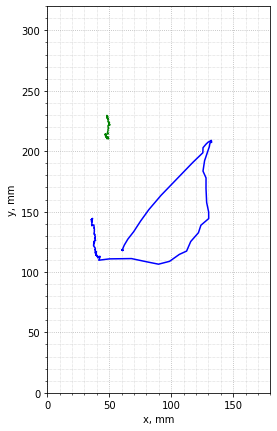

In [95]:
plot_trajectories(data, [i for i in range(0, len(data.columns) // 2)])


In [111]:
# Ploting velocities

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_velocities(data, numbers):
    ax = plt.figure().gca()
    for element in numbers:
        velocity = []
        for i in range(1, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[i - 1][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[i - 1][element * 2 + 1]
            velocity.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data) - 1)]
        plt.plot(time_value, velocity)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    

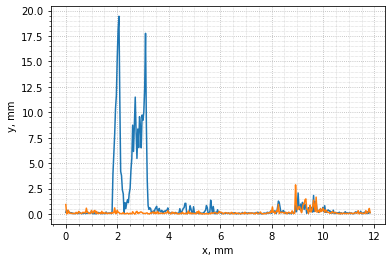

In [112]:
plot_velocities(data, [i for i in range(0, len(data.columns) // 2)])